In [77]:
from keras.models import Model, Sequential,load_model
from keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

import matplotlib.pyplot as plt

In [55]:
basePath="d://Develop/Model Desiging and Testing/Face Recognition/"

In [56]:
model_path=basePath+"PretrainModel/vgg_face_weights.h5"

Defining the VGG Face model

In [46]:
model = Sequential()


In [47]:
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Loading pertrained weights of VGGFace model

In [49]:
model.load_weights(model_path)

In [ ]:
model.summary()

VGG Face image preprocessing

In [52]:
def preprocess_image(image_path):
    img = load_img(image_path,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    return img

def find_cosine_similarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation),test_representation)
    b = np.sum(np.multiply(source_representation,source_representation))
    c = np.sum(np.multiply(test_representation,test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))


In [82]:

vgg_face_descriptor = Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)


vgg h5 model load

In [103]:

vggH5Model = load_model(basePath+"vggface.h5")

In [105]:
vggfaceH5=Model(inputs=vggH5Model.layers[0].input, outputs=vggH5Model.layers[-2].output)

Verify Facial Similarity

In [110]:
epsilon = 0.5

def verify_face(img1_path, img2_path,model):
    img1_representation = model.predict(preprocess_image(img1_path))[0,:]
    img2_representation = model.predict(preprocess_image(img2_path))[0,:]
    cosine_similarity = find_cosine_similarity(img1_representation,img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(image.load_img(img1_path))
    plt.xticks([]);plt.yticks([])
    f.add_subplot(1,2,2)
    plt.imshow(image.load_img(img2_path))
    plt.xticks([]);plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

In [122]:
img1_path=basePath+"faces_emore/Akshay Kumar/Akshay Kumar_1.jpg"
img2_path=basePath+"faces_emore/Robert Downey Jr/Robert Downey Jr_0.jpg"

1/1 [==============================] - 6s 6s/step


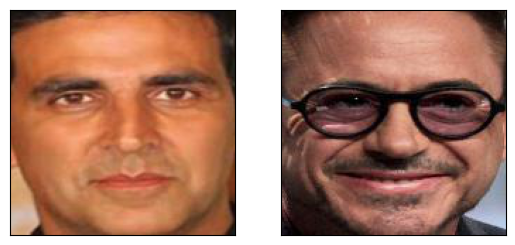

Cosine similarity:  0.5314108729362488
They are not same person!


In [123]:
verify_face(img1_path,img2_path,vgg_face_descriptor)

save the model architechture with weights

In [76]:
model.save('vggface.h5')

c:\Users\Praneeth_Dhananjaya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 11s 11s/step


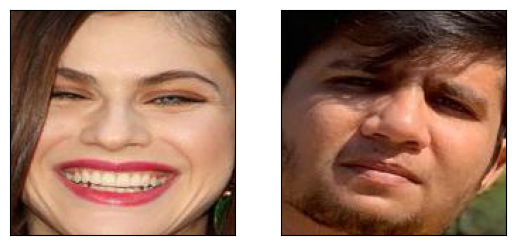

Cosine similarity:  0.8520423173904419
They are not same person!


In [117]:
verify_face(img1_path,img2_path,vggfaceH5)